# Adopt a buddy

Having a pet is one of life’s most fulfilling experiences. Your pets spoil you with their love, compassion and loyalty. And dare anyone lay a finger on you in your pet’s presence, they are in for a lot of trouble. Thanks to social media, videos of clumsy and fussy (yet adorable) pets from across the globe entertain you all day long. Their love is pure and infinite. So, in return, all pets deserve a warm and loving family, indeed. And occasional boops, of course. Numerous organizations across the world provide shelter to all homeless animals until they are adopted into a new home. However, finding a loving family for them can be a daunting task at times.  

A machine learning model that identify the type and breed of the animal based on its physical attributes and other factors. 

### Importing the Libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

### Loading the Data

In [32]:
train_df = pd.read_csv('/Users/Apple/Desktop/PROJECTS/Pet Adoption/train.csv')
train_df

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2017-01-26 00:00:00,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1,0.0,2
18830,ANSL_59900,2016-06-18 00:00:00,2017-07-09 08:37:00,NaN,Brown,0.73,14.25,15,4,2.0,4
18831,ANSL_53210,2010-07-21 00:00:00,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9,1.0,1
18832,ANSL_63468,2017-05-12 00:00:00,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1.0,2


In [33]:
test_df = pd.read_csv('/Users/Apple/Desktop/PROJECTS/Pet Adoption/test.csv')
test_df

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7
...,...,...,...,...,...,...,...,...,...
8067,ANSL_66809,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,Brown,0.82,36.08,13,9
8068,ANSL_59041,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,Tan,0.49,27.54,13,9
8069,ANSL_60034,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,Black,0.98,37.19,0,7
8070,ANSL_58066,2016-06-28 00:00:00,2017-07-20 18:19:00,NaN,Black,0.79,23.83,0,2


### Cleaning the Data

##### Checking for Duplicates

In [34]:
train_df.duplicated().sum()

0

In [35]:
test_df.duplicated().sum()

0

In [36]:
train_df['condition'] = train_df['condition'].fillna(3)
test_df['condition'] = test_df['condition'].fillna(3)

##### Dropping columns with null values

In [37]:
#train_df = train_df.dropna(subset = ['condition', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2'])
#test_df = test_df.dropna(subset = ['condition', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2'])

In [38]:
train_df

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,3.0,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2017-01-26 00:00:00,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1,0.0,2
18830,ANSL_59900,2016-06-18 00:00:00,2017-07-09 08:37:00,3.0,Brown,0.73,14.25,15,4,2.0,4
18831,ANSL_53210,2010-07-21 00:00:00,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9,1.0,1
18832,ANSL_63468,2017-05-12 00:00:00,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1.0,2


##### Replacing text values with Numerical values

In [39]:
color = train_df.color_type.unique()
color

array(['Brown Tabby', 'White', 'Brown', 'Black', 'Red', 'Tricolor',
       'Calico', 'Brown Brindle', 'Blue', 'Tortie', 'Gray', 'Fawn',
       'Buff', 'Torbie', 'Orange Tabby', 'Sable', 'Tan', 'Blue Tick',
       'Orange', 'Blue Tabby', 'Chocolate', 'Black Tabby',
       'Black Brindle', 'Cream Tabby', 'Gold', 'Calico Point',
       'Blue Merle', 'Red Merle', 'Yellow', 'Lynx Point', 'Blue Cream',
       'Flame Point', 'Cream', 'Yellow Brindle', 'Blue Tiger',
       'Seal Point', 'Red Tick', 'Brown Merle', 'Black Smoke',
       'Gray Tabby', 'Green', 'Tortie Point', 'Blue Smoke', 'Apricot',
       'Blue Point', 'Silver Tabby', 'Lilac Point', 'Silver',
       'Brown Tiger', 'Liver', 'Agouti', 'Chocolate Point', 'Liver Tick',
       'Pink', 'Black Tiger', 'Silver Lynx Point'], dtype=object)

In [40]:
label_color = {}
for i in range(len(color)):
    label_color[color[i]] = i

train_df['color_type'] = train_df['color_type'].map(label_color)
train_df
test_df['color_type'] = test_df['color_type'].map(label_color)

##### Identify Numerical and Categorical Variables

In [41]:
train_df.columns

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category'],
      dtype='object')

In [42]:
features_train = train_df[['condition', 'color_type','length(m)', 'height(cm)', 'X1', 'X2']]
features_test = test_df[['condition', 'color_type','length(m)', 'height(cm)', 'X1', 'X2']]
label_train = train_df[['breed_category', 'pet_category']]
features_numeric_col = ['length(m)', 'height(cm)']
features_categorical_col = ['condition', 'color_type']

### Visualization

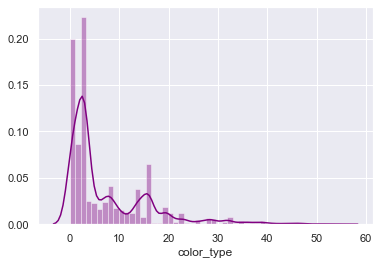

In [43]:
sns.set()
sns.distplot(train_df.color_type, color = 'purple')
plt.show()

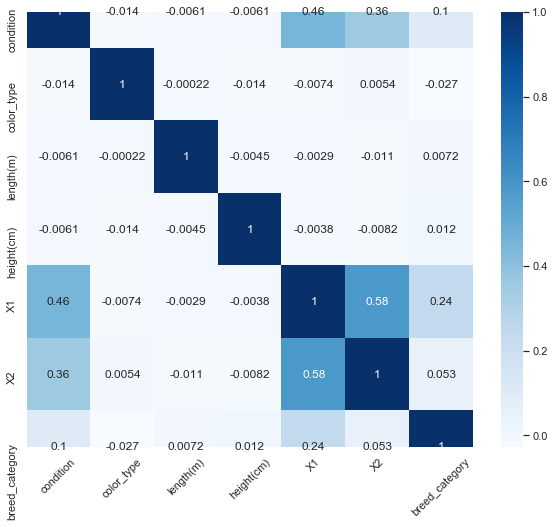

In [44]:
fig = plt.figure(figsize=(10, 8))
features = ['condition', 'color_type','length(m)', 'height(cm)', 'X1', 'X2']
ax = sns.heatmap(train_df[features + ['breed_category']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

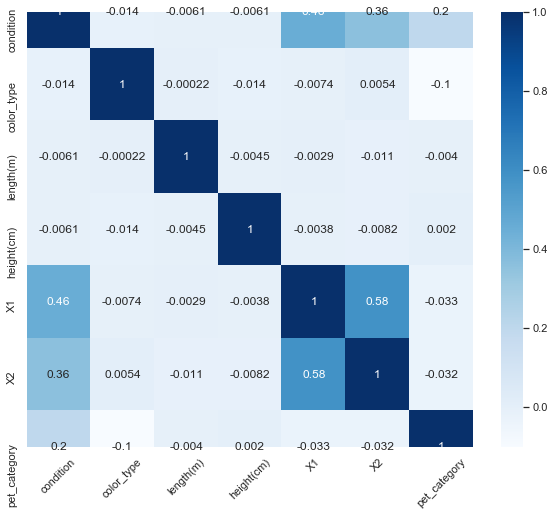

In [45]:
fig = plt.figure(figsize=(10, 8))
features = ['condition', 'color_type','length(m)', 'height(cm)', 'X1', 'X2']
ax = sns.heatmap(train_df[features + ['pet_category']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

### Normalizing the data

In [46]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

### Training the Model

In [47]:
model_breed = SVC(kernel = 'rbf', C=1)
model_breed.fit(features_train, label_train.breed_category)
print('SVM Classifier: ',model_breed.score(features_train, label_train.breed_category))

model1_breed = LogisticRegression()
model1_breed.fit(features_train, label_train.breed_category)
print('Logistic Regression: ',model1_breed.score(features_train, label_train.breed_category))


model2_breed = KNeighborsClassifier(n_neighbors = 7)
model2_breed.fit(features_train, label_train.breed_category)
print('KNN: ',model2_breed.score(features_train, label_train.breed_category))

SVM Classifier:  0.8985345651481363
Logistic Regression:  0.8131570563873846


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


KNN:  0.9211001380482107


In [49]:
model_pet = SVC(kernel = 'rbf', C=1)
model_pet.fit(features_train, label_train.pet_category)
print('SVM Classifier: ',model_pet.score(features_train, label_train.pet_category))

model1_pet= LogisticRegression()
model1_pet.fit(features_train, label_train.pet_category)
print('Logistic Regression: ',model1_pet.score(features_train, label_train.pet_category))

model2_pet = KNeighborsClassifier(n_neighbors = 7)
model2_pet.fit(features_train, label_train.pet_category)
print('KNN: ',model2_pet.score(features_train,label_train.pet_category))

SVM Classifier:  0.7116385260698737
Logistic Regression:  0.6934267813528725


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


KNN:  0.7853350323882341


### Testing the Model

In [50]:
predict = test_df[['condition', 'color_type','length(m)', 'height(cm)', 'X1', 'X2']]
predict['breed_category']= model2_breed.predict(features_test)
predict['pet_category']= model2_pet.predict(features_test)
predict

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,0.0,3,0.87,42.73,0,7,1.0,2
1,1.0,14,0.06,6.71,0,1,0.0,1
2,1.0,3,0.24,41.21,0,7,0.0,2
3,1.0,3,0.29,8.46,7,1,0.0,2
4,1.0,2,0.71,30.92,0,7,0.0,2
...,...,...,...,...,...,...,...,...
8067,2.0,2,0.82,36.08,13,9,1.0,1
8068,0.0,16,0.49,27.54,13,9,1.0,2
8069,0.0,3,0.98,37.19,0,7,1.0,2
8070,3.0,3,0.79,23.83,0,2,2.0,4


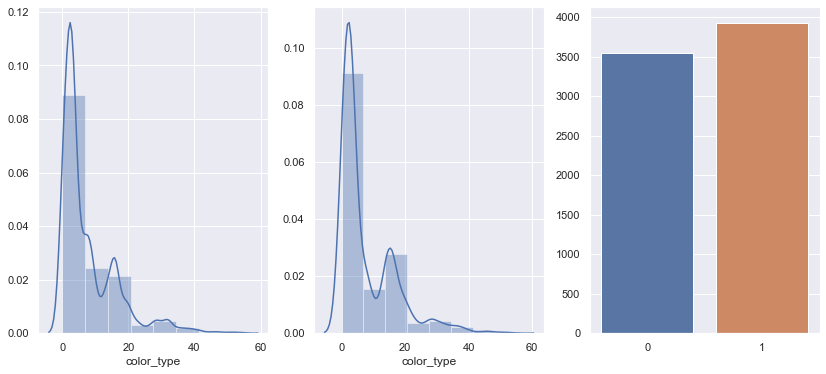

In [51]:
breed_1 = predict[predict['breed_category'] == 1]
breed_0 = predict[predict['breed_category'] == 0]
x = ['0', '1']
y_f = predict[predict.breed_category == 1.0]
y_m = predict[predict.breed_category == 0.0]
y = [len(y_f), len(y_m)]
plt.figure(figsize = (14, 6))
plt.subplot(1,3,1)
sns.distplot(breed_1['color_type'], bins = 8)
plt.subplot(1,3,2)
sns.distplot(breed_0['color_type'], bins = 8)
plt.subplot(1,3,3)
sns.barplot(x,y)
plt.show()

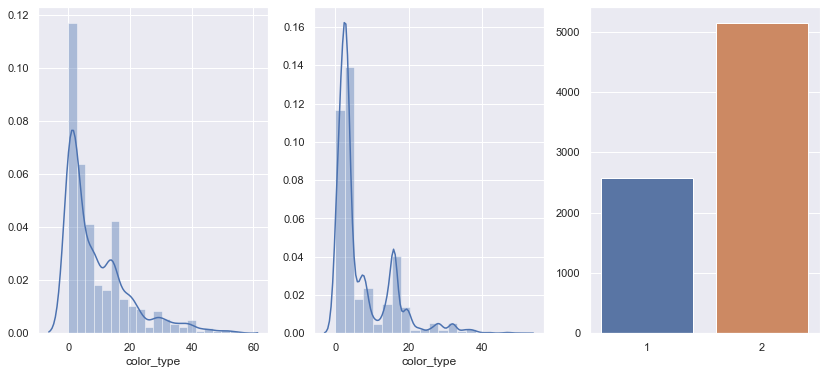

In [52]:
pet_1 = predict[predict['pet_category'] == 1]
pet_2 = predict[predict['pet_category'] == 2]
x = ['1', '2']
y_f = predict[predict.pet_category == 1]
y_m = predict[predict.pet_category == 2]
y = [len(y_f), len(y_m)]
plt.figure(figsize = (14, 6))
plt.subplot(1,3,1)
sns.distplot(pet_1['color_type'], bins = 20)
plt.subplot(1,3,2)
sns.distplot(pet_2['color_type'], bins = 20)
plt.subplot(1,3,3)
sns.barplot(x,y)
plt.show()

In [53]:
submission = test_df[['pet_id']]
submission['breed_category']= model2_breed.predict(features_test)
submission['pet_category']= model2_pet.predict(features_test)
submission.to_csv('submission.csv', index = False)
submission

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2
1,ANSL_76663,0.0,1
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,2
4,ANSL_72871,0.0,2
...,...,...,...
8067,ANSL_66809,1.0,1
8068,ANSL_59041,1.0,2
8069,ANSL_60034,1.0,2
8070,ANSL_58066,2.0,4
